# Template Matching

## Teoria

A Correspodência de modelos, ou mais conhecido como template matching, é um método que procura e localiza o **local** de uma imagem de modelo em uma imagem maior. O OpenCV vem com a função **cv2.matchTempalte()** para essa finalidade. Ele simplesmente desliza a imagem do modelo sobre a imagem de entrada (como na convolução 2D) e compara o modelo e o match da imagem de entrada sb a imagem do modelo. Vários métodos de coparação são implementados no OpenCV. O retorno da função é uma imagem em escala de cinza, qem que cada pixel indica o quanto a vizinhança desse pixel corresponde ao modelo.

Se a imagem de entrada for to tamanho (WxH) e a imagem do modelo for do tamanho (wxh), a imagem de saida terá o tamanhdo (W-w + 1, H-h - 1. Depois de obter o resultado, você pode usar a função **cv2.minMaxLoc()** para descobrir onde está o valor máximo/mínimo. Tome-o como o canto superior esquerdo do retângulo e iterprete (w,h), como largura e altura do retângulo. esse retângulo é sua região de modelo.

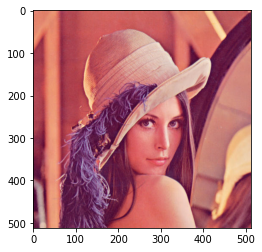

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%notebook inline

full = cv.imread("ex_template_matching.jpg")
full =  cv.cvtColor(full, cv.COLOR_BGR2RGB)
plt.imshow(full)

### Vamos usar o rosto da Lena como um sub-imagem

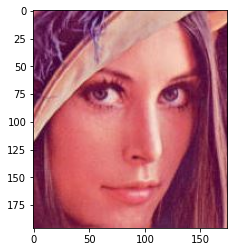

In [3]:
face = cv.imread("rosto_template.jpg")
face =  cv.cvtColor(face, cv.COLOR_BGR2RGB)
plt.imshow(face)

### Eval é usada para converter uma string em uma função

In [4]:
sum([1,2,3])

6

In [5]:
mystring = 'sum'

In [6]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [7]:
myFunc = eval(mystring)

In [8]:
myFunc([1,2,3])

6

### Funções template matching

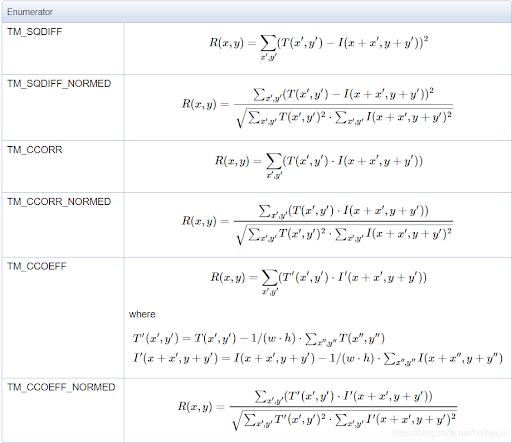

In [9]:
# Alt, lar e canal do template macthing
height, width, channels = face.shape

#Todos os 6 métodos para comparação em uma lista
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

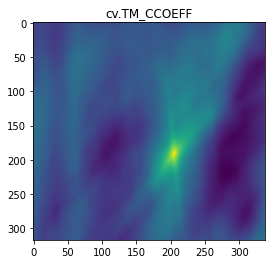

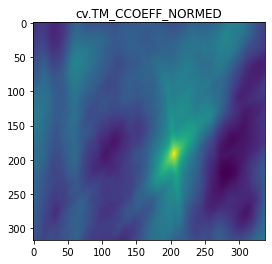

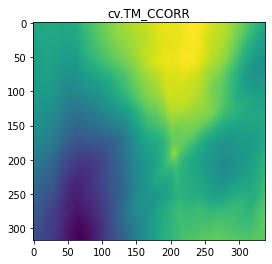

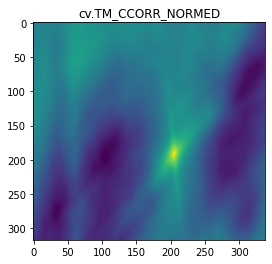

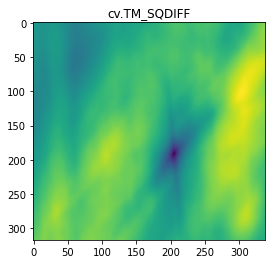

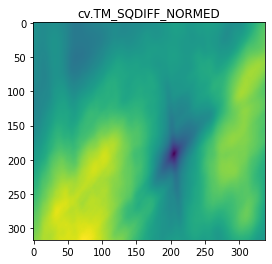

In [10]:
for m in methods:
    
    #Criar um copia da imagem
    full_copy = full.copy()
    
    #Usar a fç eval passandos as strings
    method = eval(m)
    
    #Aplicando TM com os metodos
    res = cv.matchTemplate(full_copy, face, method)
    
    plt.imshow(res)
    plt.title(m)
    plt.show()

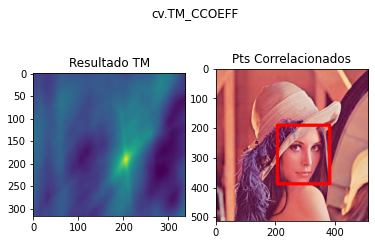

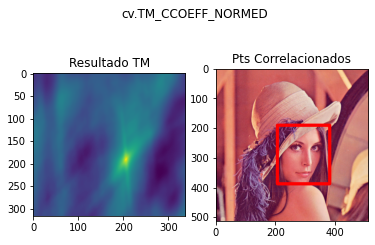

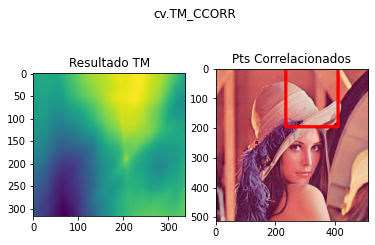

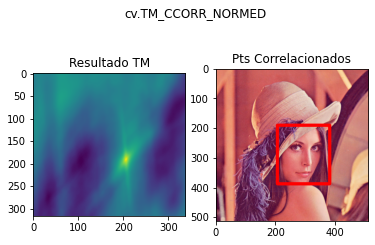

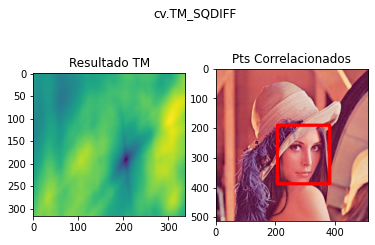

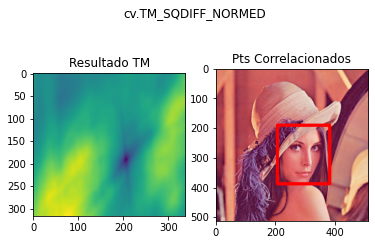

In [11]:
for m in methods:
    
    #Criar um copia da imagem
    full_copy = full.copy()
    
    #Usar a fç eval passandos as strings
    method = eval(m)
    
    #Aplicando TM com os metodos
    res = cv.matchTemplate(full_copy, face, method)
    
    #Pegar os valores Max e Min, além de seus locais
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    #Configurar retângulo
    # Se o método for TM_SQDIFF ou TM_SQDIFF_NORMED, pegar o min
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Resultado TM')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Pts Correlacionados')
    plt.suptitle(m)
    
    plt.show()
    print('\n')